# Census Income Project

### Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [567]:
# Importing all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

### Loading and Reading the Dataset

In [568]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Upon preliminary analysis of Dataset, we can assume that the datatypes consists of mixed data set; i.e. continous type and categorical type is available

Below are the list of Feature Columns:

1. Age

2. Workclass

3. Fnlwgt

4. Education

5. Education_num

6. Marital_status

7. Occupation

8. Relationship

9. Race

10. Sex

11. Capital_gain

12. Capital_loss

13. Hours_per_week

14. Native_country

Target Variable is Income

Since the target variable 'Income' data type is categorical, Need to approach this data set as Classification Problem

In [569]:
df.shape

(32560, 15)

There are 32560 Rows and 15 Columns including the Target in this Dataset

### Checking for any Null Values in the dataset 

In [570]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no Null Values/ Missing Values in the dataset

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dataset consists of mixed Datatypes, Below are the observations, we can avail from above information.

Continous Data Columns (Integer Type): 

Out of 15 Columns, 6 Columns has Numerical Data

1. Age

2. Fnlwgt

3. Education_num

4. Capital_gain

5. Capital_loss

6. Hours_per_week

Categorical Data Columns: 

Out of 15 Columns, 9 Columns has Categorical Data

1. Workclass

2. Education

3. Marital_status

4. Occupation

5. Relationship

6. Race

7. Sex

8. Native_country

9. Income (Target Variable)


### Analyzing the Basic Statistics of the Dataset

In [572]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can observe following things from above statistics, 

1. Age, Fnlwgt, Education_num and Hours_per_week columns will have normal distribution since mean is greater than std values.

2. mean and 50% values are almost same for Age, Fnlwgt, Education_num, Hours_per_week columns

3. Outliers presence are possible in Capital_gain and Capital_loss columns since the difference between 75% and max is very high and also other columns might have outliers too.

### Checking for the Unique Set of Values/ Elements in all Columns

In [573]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

1. Sex and Income Column has 2 Unique Set of data.

2. Workclass, Education, Education_num, Marital_status, Occupation, Relationship, Race columns data has a fixed set of datas So, need to analyse these columns more with respect to relationship with Income (Target Variable).

### Analyzing Distribution of both Target and Feature Columns

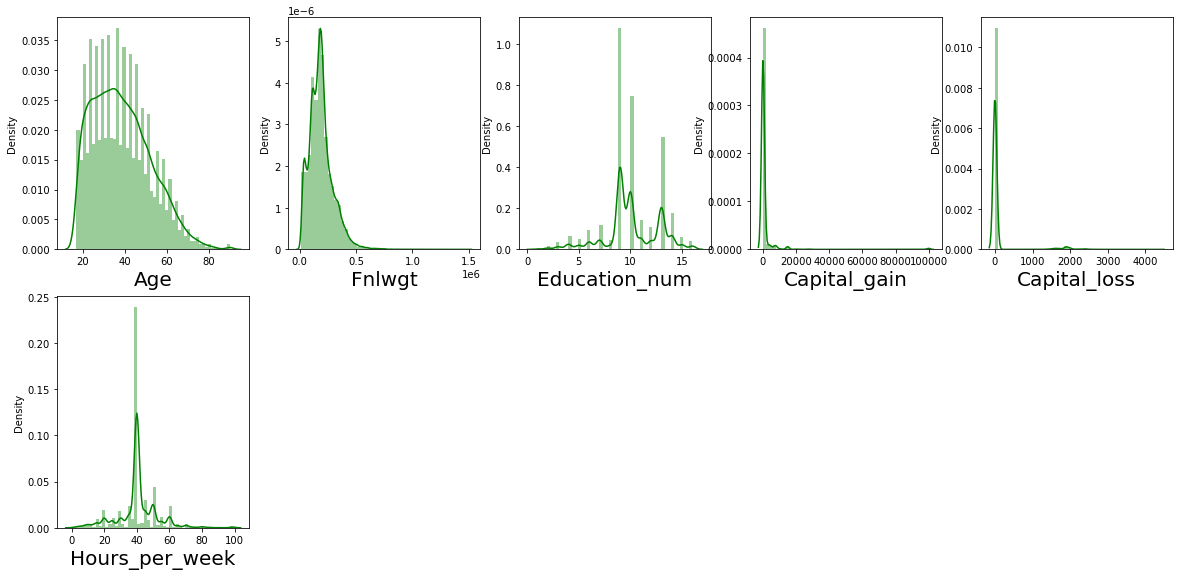

In [574]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in df.drop(columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income'], axis = 1):
    if plot_number <=35:
        plt.subplot(7,5,plot_number)
        sns.distplot(df[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

Upon analyzing above graphs, we can predict there might be skewness in few columns as those columns are not normally distributed


Age, Fnlwgt, Capital_gain, Capital_loss column data will have skewness

Education_num and Hours_per_week are distributed normally to an extent

In [575]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

As predicted Age, Fnlwgt, Capital_gain, Capital_loss Columns data are skewed, i.e out of -0.50 to +0.50 Range 

We can also observe Education_num and Hours_per_week skewness is within the allowed range

### Analysis of Independent and Dependent Variables

In [576]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

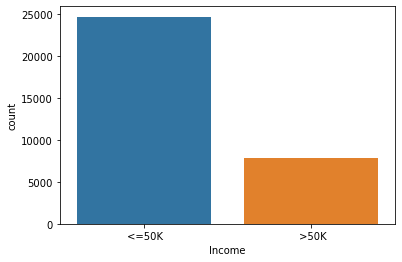

In [577]:
sns.countplot(df['Income'])

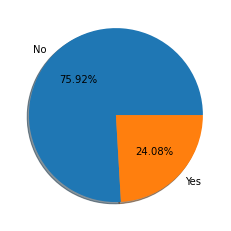

In [578]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(df['Income'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Upon reviewing above 3 figures, we can observe, there are 2 distinct/ unique values for Target Variable - '<=50K' and '>50K'


There is also a class imbalance which needs to corrected.

<=50K : 75.92% : 24719

.>50K  : 24.08% : 7841 

In [579]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

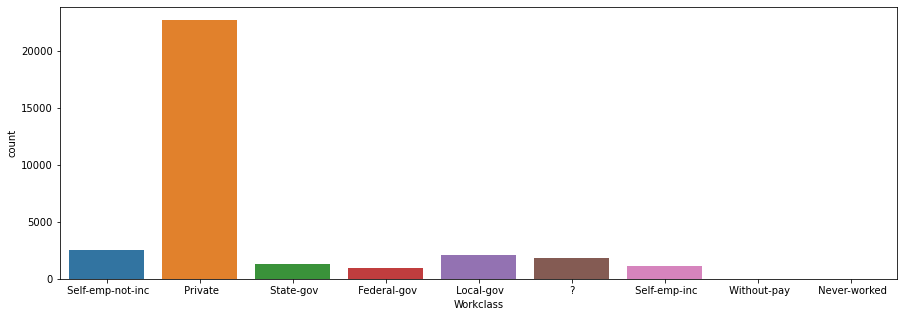

In [580]:
plt.figure(figsize=(15,5))
sns.countplot(df['Workclass'])

We have 9 unique values for Workclass

1. Private

2. Self-emp-not-inc

3. Local-gov

4. ?

5. State-gov

6. Self-emp-inc

7. Federal-gov

8. Without-pay

9. Never-worked

Private is majority, followed by Self-emp-not-inc and Never-worked is least.

There is a '?' data in Workclass with count of 1836. we shall correct the '?' data in coming stages

In [581]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

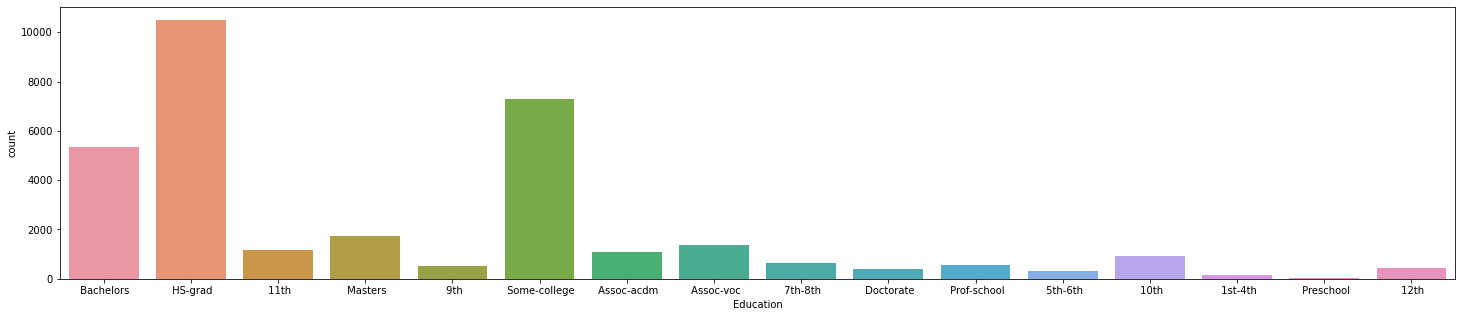

In [582]:
plt.figure(figsize=(25,5))
sns.countplot(df['Education'])

We have 16 unique values for Education

1. HS-grad

2. Some-college

3. Bachelors

4. Masters

5. Assoc-voc

6. 11th

7. Assoc-acdm

8. 10th

9. 7th-8th

10. Prof-school

11. 9th

12. 12th

13. Doctorate

14. 5th-6th

15. 1st-4th

16. Preschool

HS-grad is majority, followed by Some-college and Preschool is the least.

Upon reviewing the dataset, we can observe there is a relationship between Education and Education_num. So we shall analyse the same in coming steps/ stages

In [583]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

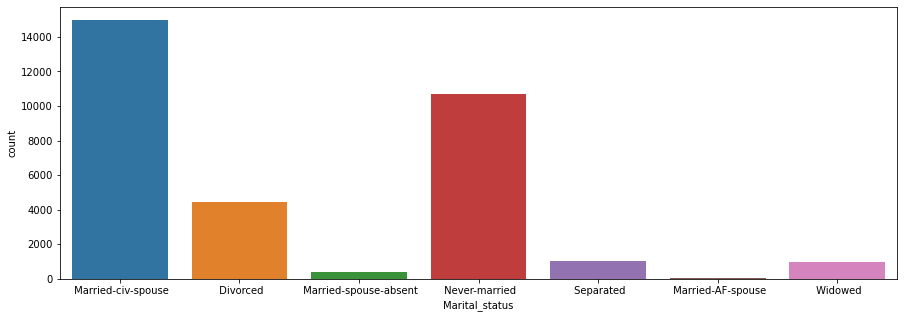

In [584]:
plt.figure(figsize=(15,5))
sns.countplot(df['Marital_status'])

We have 7 unique values for Marital_status

1. Married-civ-spouse

2. Never-married

3. Divorced

4. Separated

5. Widowed

6. Married-spouse-absent

7. Married-AF-spouse

Married-civ-spouse is majority, followed by Never-married and Married-AF-spouse is the least.

In [585]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

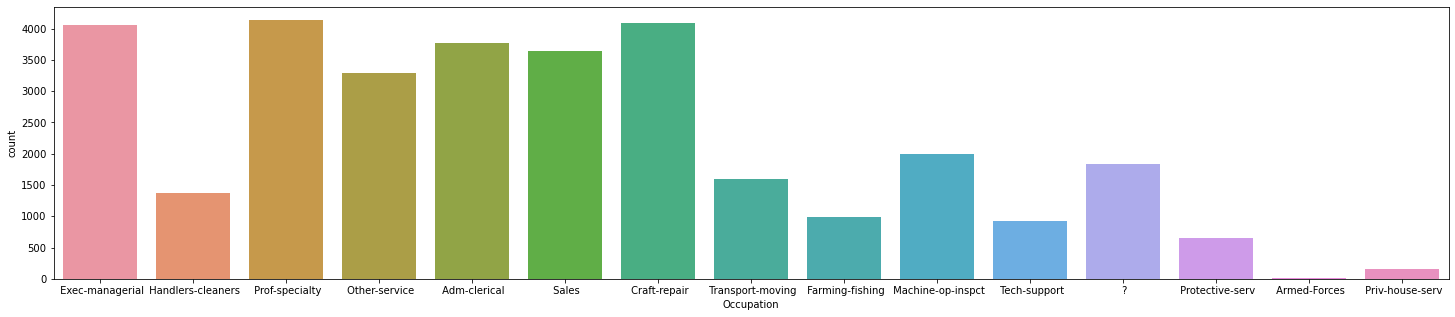

In [586]:
plt.figure(figsize=(25,5))
sns.countplot(df['Occupation'])

We have 17 unique values for Occupation

1. Prof-specialty

2. Craft-repair

3. Exec-managerial

4. Adm-clerical

5. Sales

6. Other-service

7. Machine-op-inspct

8. ?

9. Transport-moving

10. Handlers-cleaners

11. Farming-fishing

12. Tech-support

13. Protective-serv

14. Priv-house-serv

15. Armed-Forces

Majority are Prof-specialty followed by Craft-repair and Exec-managerial. Armed-Forces are least

There is a '?' data in Occupation with count of 1836. we shall correct the '?' data in coming stages

In [587]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

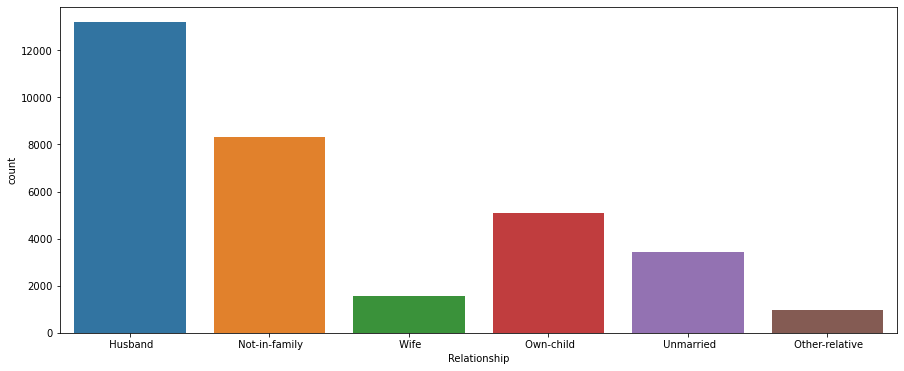

In [588]:
plt.figure(figsize=(15,6))
sns.countplot(df['Relationship'])

We have 6 unique values for Relationship

1. Husband

2. Not-in-family

3. Own-child

4. Unmarried

5. Wife

6. Other-relative

Majority of the people are Husbands followed by Not-in-family and Minority people are Other-relative

In [589]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

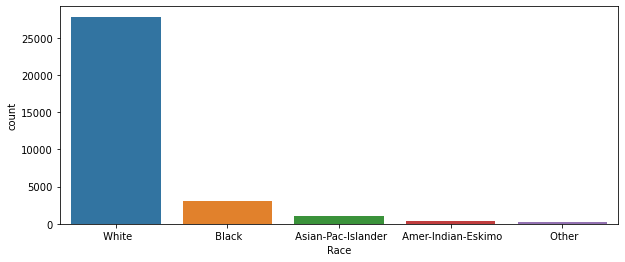

In [590]:
plt.figure(figsize=(10,4))
sns.countplot(df['Race'])

We have 5 unique values under Race


1. White

2. Black

3. Asian-Pac-Islander

4. Amer-Indian-Eskimo

5. Other

Majority of the people are of White Race followed Black Race

In [591]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

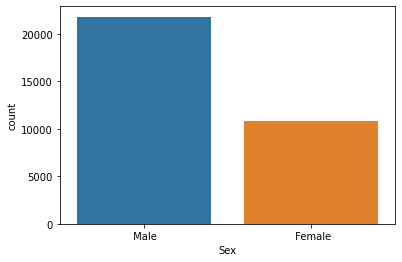

In [592]:
sns.countplot(df['Sex'])

Males are more than Females by nearly 50%

In [593]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

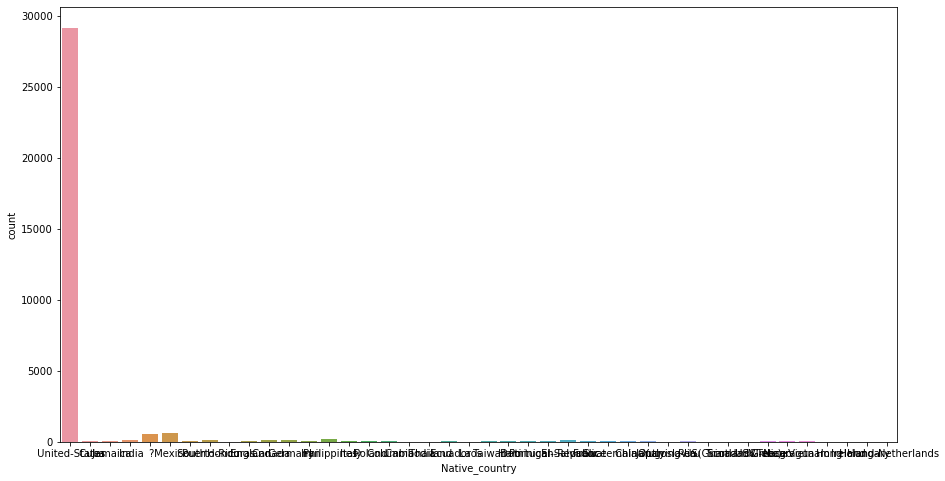

In [594]:
plt.figure(figsize=(15,8))
sns.countplot(df['Native_country'])

We have 42 unique values under Native_country

Majority (nearly 90%) of the people are United-States Native followed by Mexico.

There is a '?' data in Native_country with count of 583. we shall correct the '?' data in coming stages

### Analyzing the relationship between independent variable and dependent Variable

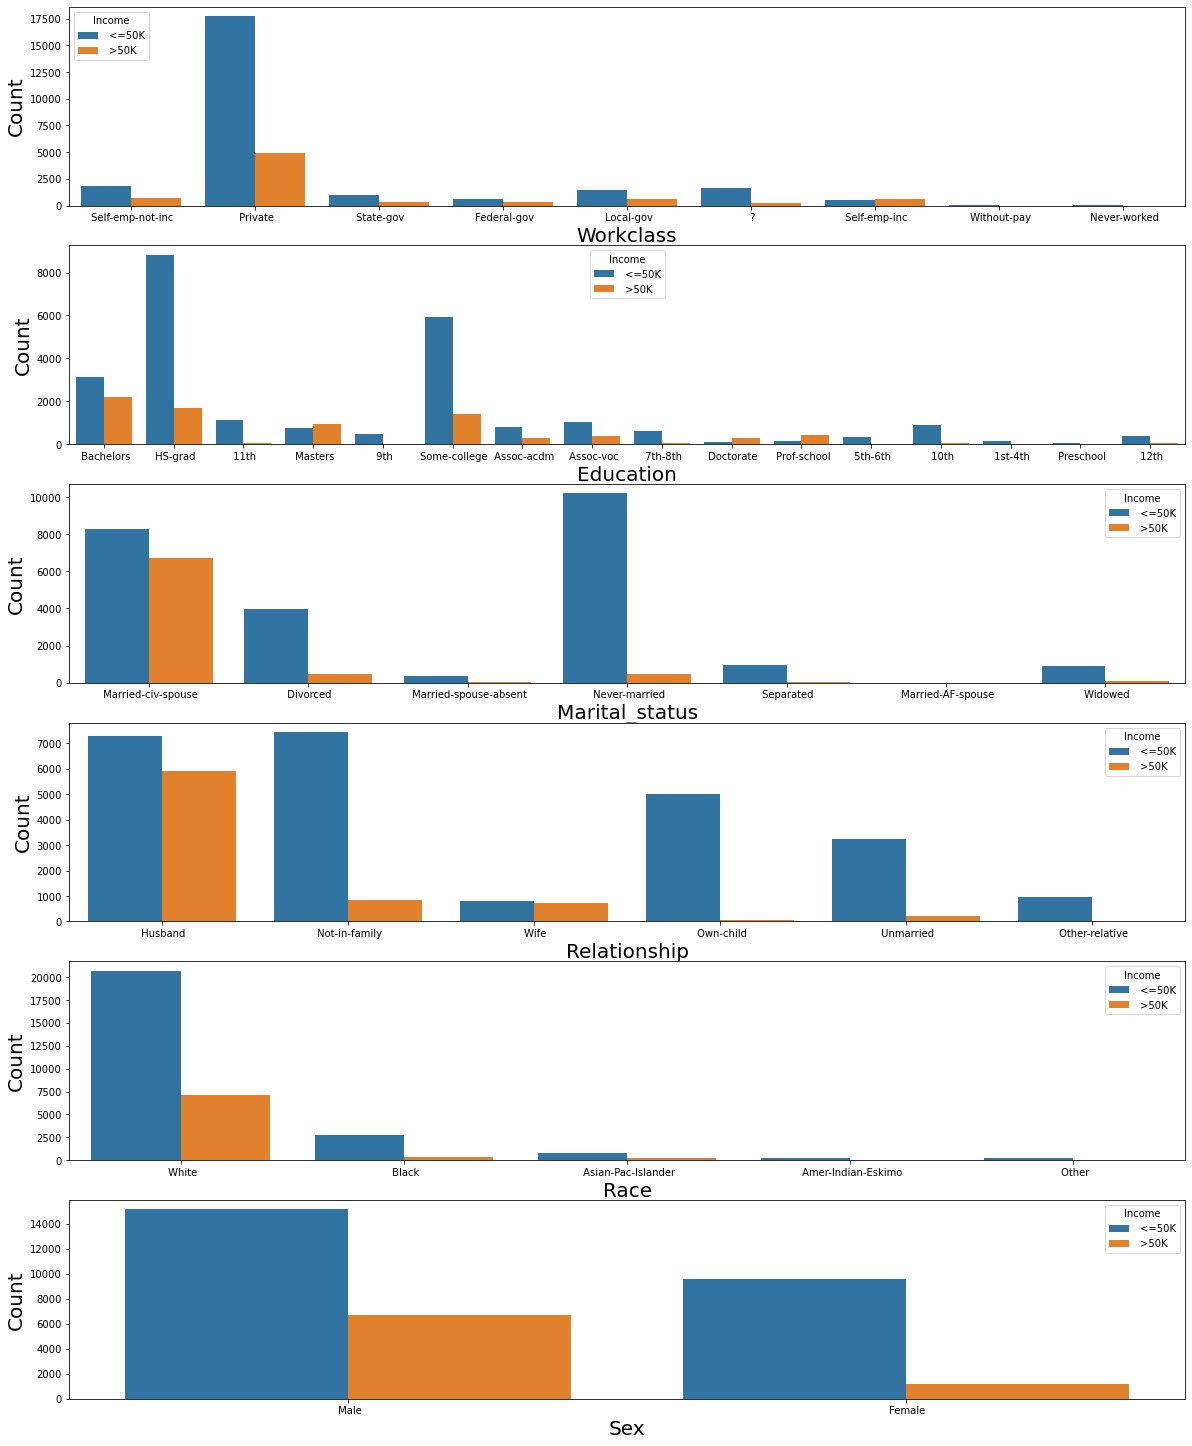

In [595]:
plt.figure(figsize=(20,30),facecolor='white')
plot_number2=1
x_plot2 = df[['Workclass', 'Education', 'Marital_status', 'Relationship', 'Race', 'Sex']]
y_plot2 = df['Income']
for i in x_plot2:
    if plot_number2<=len(x_plot2.columns):
        ax2=plt.subplot(7,1,plot_number2)
        sns.countplot(x_plot2[i], hue=y_plot2)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plot_number2+=1
plt.show()

Below are the observation obtained by analyzing above comparision graph

1. Workclass - Private Employees are high in earning >50K and also they are high in earning less than <=50K due to the majority of  the people fall under private employment. In case of self-employed-inc people, there are more people earning >50K in same category.

2. Education - HS-grad and Some-college has more people earning less than 50K. More People with Bachelors Education earn more than 50K followed by HS-grad and some-college education background people.

3. Marital_status - Married-civ-spouse people are more in case of earning >50K and Never-married people are more in case of earning <=50K

4. Relationship - Husbands are majority in case of earnings greater than 50K and Not-in-family people are high in case of earnings less than 50K. In case of wife, people with earnings greater than 50K and people with earnings less than 50K are almost same.

5. Race - White people are more in numbers in case of both earning cases due to majority of white people in overall population as per the dataset

6. Sex - Males are more in numbers in case of earning >50K comparatively.

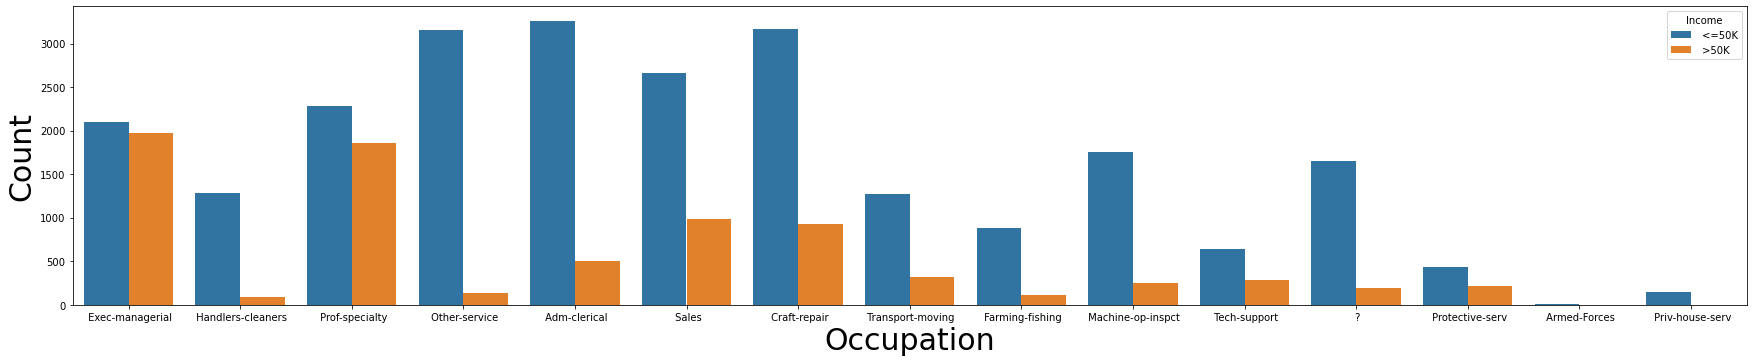

In [596]:
plt.figure(figsize=(30,45),facecolor='white')
plot_number2=1
x_plot2 = df[['Occupation']]
y_plot2 = df['Income']
for i in x_plot2:
    if plot_number2<=len(x_plot2.columns):
        ax2=plt.subplot(7,1,plot_number2)
        sns.countplot(x_plot2[i], hue=y_plot2)
        plt.xlabel(i,fontsize=30)
        plt.ylabel('Count',fontsize=30)
    plot_number2+=1
plt.show()

Occupation - More number of Exec-Managers earn more than 50K followed by Prof-speciality. Adm-clerical Job people are more in case of earnings less than 50K followed by craft-repair and other-service.

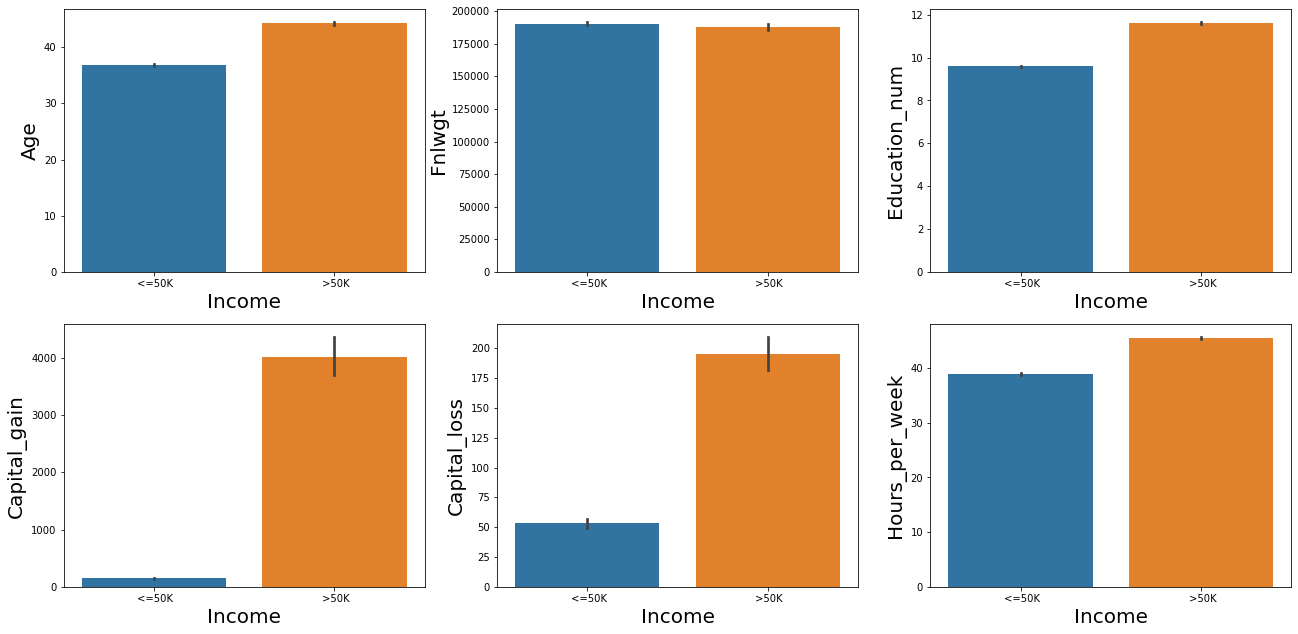

In [597]:
plt.figure(figsize=(22,28),facecolor='white')
plot_number=1
x_plot = df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
y_plot = df['Income']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('Income',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

Below are the observation obtained by analyzing above comparision graph

1. Age - People with Age greater than 36 are earning >50K.

2. Fnlwgt - There is not much difference in case of Fnlwgt with respect to people earning >50K and people earning <50K. This parameter is almost same and doesnt affect much the target variable (Income). So after cross checking the correlation, we can drop this column if needed. 

3. Education_num - Most of the People with Education_num greater than 9 till 16 earn >50K

4. Capital_gain - Most of the People with higher Capital_gain earn >50K

5. Capital_loss - Most of the People with higher Capital_gain earn >50K too. We can keep the threshold as 50

6. Hours_per_week - Most of the People with Hours_per_week greater than 39 earn >50K

<AxesSubplot:xlabel='Native_country', ylabel='count'>

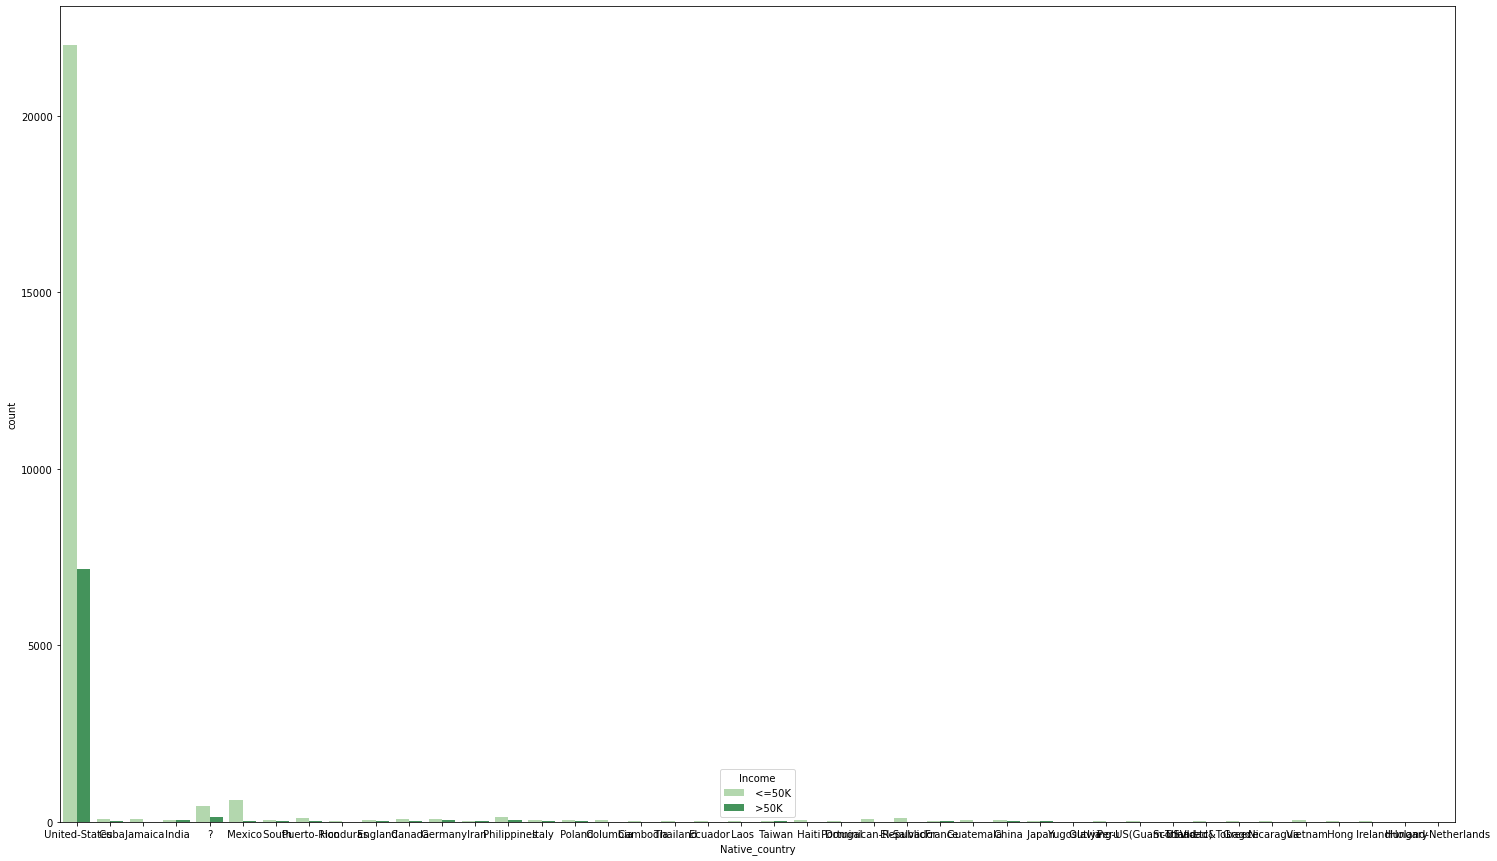

In [598]:
plt.figure(figsize=(25,15))
sns.countplot(df['Native_country'],hue=df['Income'],palette='Greens')

In [599]:
pd.crosstab(df.Native_country, df.Income)

Income,<=50K,>50K
Native_country,,
?,437,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


People  with United-States native are more in both earning case due to its higher majority in overall population in given dataset

### Correcting the Invalid Data (?)

In [600]:
(df==' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [601]:
df.replace({' ?': np.nan}, inplace=True)

Replacing the ? data with Null Values

In [602]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [604]:
common_value_Workclass = 'Private'
df['Workclass'] = df['Workclass'].fillna(common_value_Workclass)

Private is most common value under Workclass so updating the null values with "Private"

In [605]:
common_value_Native_country = 'United-States'
df['Native_country'] = df['Native_country'].fillna(common_value_Native_country)

United-States is most common value under Native_country so updating the null values with "United-States"

In [606]:
df.isnull().sum()

Age                  0
Workclass            0
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

In [607]:
df[df['Occupation'].isnull()]['Education'].value_counts()

 HS-grad         533
 Some-college    516
 Bachelors       173
 11th            119
 10th            102
 7th-8th          73
 Assoc-voc        61
 9th              51
 Masters          48
 Assoc-acdm       47
 12th             40
 5th-6th          30
 Prof-school      18
 Doctorate        15
 1st-4th          12
 Preschool         5
Name: Education, dtype: int64

Analyzing Occupation and Education Columns for any relationship. However found no reasonable relationship

In [608]:
df[df['Occupation'].isnull()]['Workclass'].value_counts()

Private          1836
 Never-worked       7
Name: Workclass, dtype: int64

Analyzing Occupation and Workclass Columns for any relationship. found 7 people are Never-worked out of 1843 Null data. So we shall update these 7 data with new output as No Occupation 

In [609]:
(df['Workclass']==' Never-worked').sum()

7

Checking whether there are any other Never-worked data in Workclass apart from Null Occupation relative data. We can observe there is no such data apart from this 7 data

In [610]:
missing_value = 'Missing Info'
df['Occupation'] = df['Occupation'].fillna(missing_value)

In [611]:
df['Occupation'].isnull().value_counts()

False    32560
Name: Occupation, dtype: int64

In [612]:
value_Occupation = 'No Occupation'
for i in range(len(df['Workclass'])):
    if df['Workclass'][i]==' Never-worked':
        df['Occupation'][i] = 'No Occupation'

Updating the 7 data value as No Occupation and remaining 1836 as Missing Info which will be drop since couldnt find a relationship to update.

In [613]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Missing Info          1836
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
No Occupation            7
Name: Occupation, dtype: int64

In [614]:
df.replace({'Missing Info': np.nan}, inplace=True)

In [615]:
df.isnull().sum()

Age                  0
Workclass            0
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1836
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

In [616]:
df.shape

(32560, 15)

In [617]:
df.dropna(inplace=True)

In [618]:
df.shape

(30724, 15)

we can observe that the invalid data in  Occupation is dropped. 32560-30724=1836

### Encoding the Categorical Data using Label Encoder

In [619]:
pd.crosstab(df.Education, df.Education_num)

Education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,833,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1057,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,393,0,0,0,0,0,0,0,0
1st-4th,0,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,303,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,574,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,463,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1020,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1321,0,0,0,0,0


From the above analysis, we can observe that each Education Column data is represented under Education_num column.

10th in Education is represented as 6 in Education_num Column.

All the 16 types of Education Column values is represented in Education_num Column (1 to 16).

So we shall drop this column if required.

    After checking the accuracy with dropping the Education column, it was observed that there was no much difference in accuaracy so retaining the Education Column

In [620]:
le = LabelEncoder()
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Income'] = le.fit_transform(df['Income'])

In [621]:
df.shape

(30724, 15)

Crosschecking whether the Data Shape is correct after removing Education Column

In [622]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


Crosschecking whether categorical data is encoded or not. It can be confirmed that encoding is done correctly

In [623]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30724.000000,30724.000000,3.072400e+04,30724.000000,30724.000000,30724.000000,30724.000000,30724.000000,30724.000000,30724.000000,30724.000000,30724.000000,30724.000000,30724.000000,30724.000000
mean,38.439494,3.099987,1.898574e+05,10.327822,10.129606,2.583225,5.969112,1.417621,3.670095,0.676735,1105.750325,88.892852,40.946491,36.466443,0.248991
std,13.119878,1.139446,1.054583e+05,3.810769,2.562692,1.495691,4.027287,1.601501,0.844096,0.467731,7497.147294,405.619493,11.987579,6.080545,0.432436
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178330e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.785235e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,2.373170e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30724 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30724 non-null  int64
 1   Workclass       30724 non-null  int32
 2   Fnlwgt          30724 non-null  int64
 3   Education       30724 non-null  int32
 4   Education_num   30724 non-null  int64
 5   Marital_status  30724 non-null  int32
 6   Occupation      30724 non-null  int32
 7   Relationship    30724 non-null  int32
 8   Race            30724 non-null  int32
 9   Sex             30724 non-null  int32
 10  Capital_gain    30724 non-null  int64
 11  Capital_loss    30724 non-null  int64
 12  Hours_per_week  30724 non-null  int64
 13  Native_country  30724 non-null  int32
 14  Income          30724 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.7 MB


Analyzing the changes in dataset after encoding. All values are integer now. Almost similar observation is reflecting like the earlier one

### Checking Correlation between each columns data

In [625]:
corr_mat=df.corr()
corr_mat

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.044314,-0.076628,-0.001917,0.043883,-0.276865,-0.006650,-0.246228,0.025246,0.082028,0.080420,0.060463,0.102192,-0.001635,0.242548
Workclass,0.044314,1.000000,-0.025059,0.004445,0.001882,-0.019627,0.010802,-0.058271,0.049594,0.072681,0.031618,0.002380,0.041037,-0.001273,0.001130
Fnlwgt,-0.076628,-0.025059,1.000000,-0.026622,-0.043478,0.031809,0.000781,0.008019,-0.023571,0.026672,-0.000196,-0.010034,-0.022764,-0.065491,-0.009509
Education,-0.001917,0.004445,-0.026622,1.000000,0.346051,-0.040649,-0.038271,-0.012449,0.011098,-0.028123,0.029793,0.015126,0.058968,0.076634,0.078338
Education_num,0.043883,0.001882,-0.043478,0.346051,1.000000,-0.063878,0.088627,-0.092361,0.029743,0.007365,0.124254,0.079366,0.151373,0.092349,0.334727
Marital_status,-0.276865,-0.019627,0.031809,-0.040649,-0.063878,1.000000,0.022579,0.179239,-0.067841,-0.120336,-0.043007,-0.035616,-0.186874,-0.024058,-0.194585
Occupation,-0.006650,0.010802,0.000781,-0.038271,0.088627,0.022579,1.000000,-0.052533,-0.001360,0.062106,0.021349,0.012925,0.017805,-0.001969,0.049832
Relationship,-0.246228,-0.058271,0.008019,-0.012449,-0.092361,0.179239,-0.052533,1.000000,-0.115501,-0.585702,-0.056776,-0.062622,-0.257393,-0.011103,-0.251341
Race,0.025246,0.049594,-0.023571,0.011098,0.029743,-0.067841,-0.001360,-0.115501,1.000000,0.086184,0.011532,0.020979,0.044711,0.113895,0.070960
Sex,0.082028,0.072681,0.026672,-0.028123,0.007365,-0.120336,0.062106,-0.585702,0.086184,1.000000,0.047747,0.047006,0.230256,0.002286,0.216599


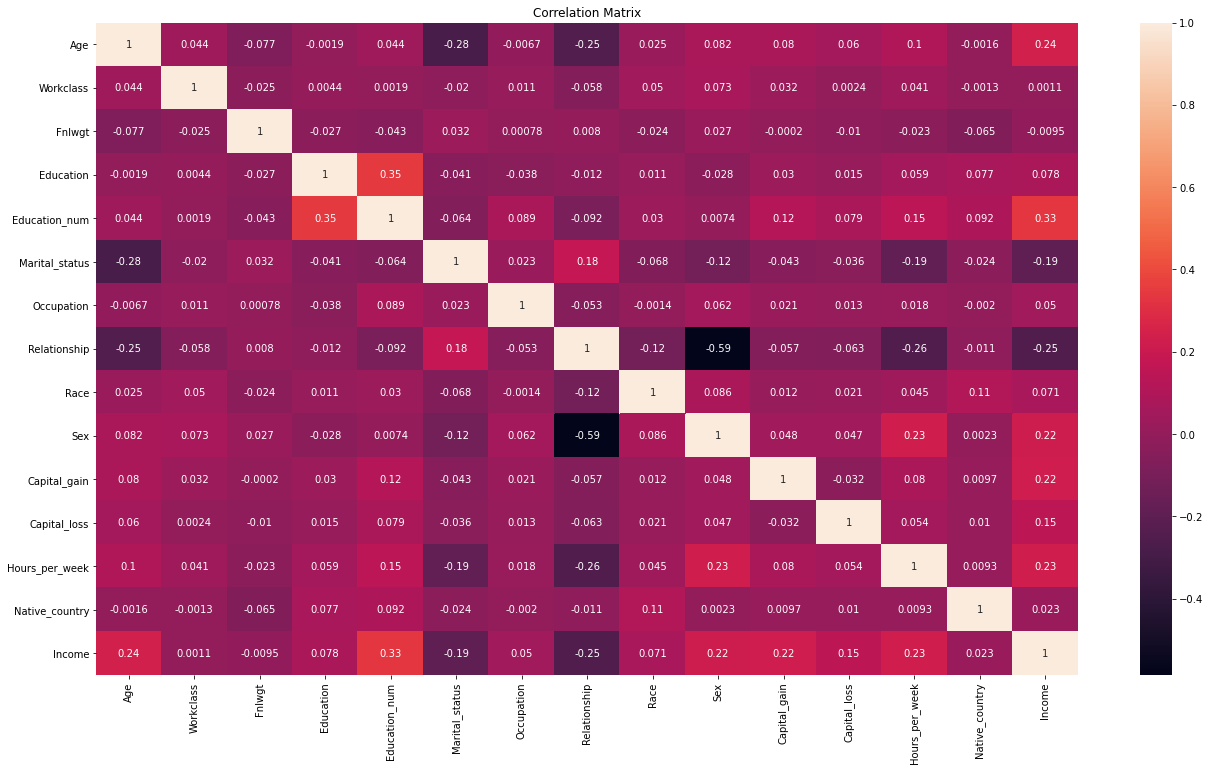

In [626]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

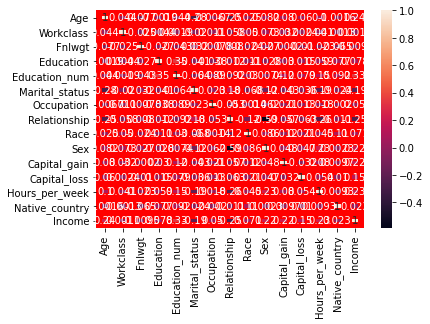

In [627]:
sns.heatmap(corr_mat,annot=True,linewidths=10,linecolor='r')

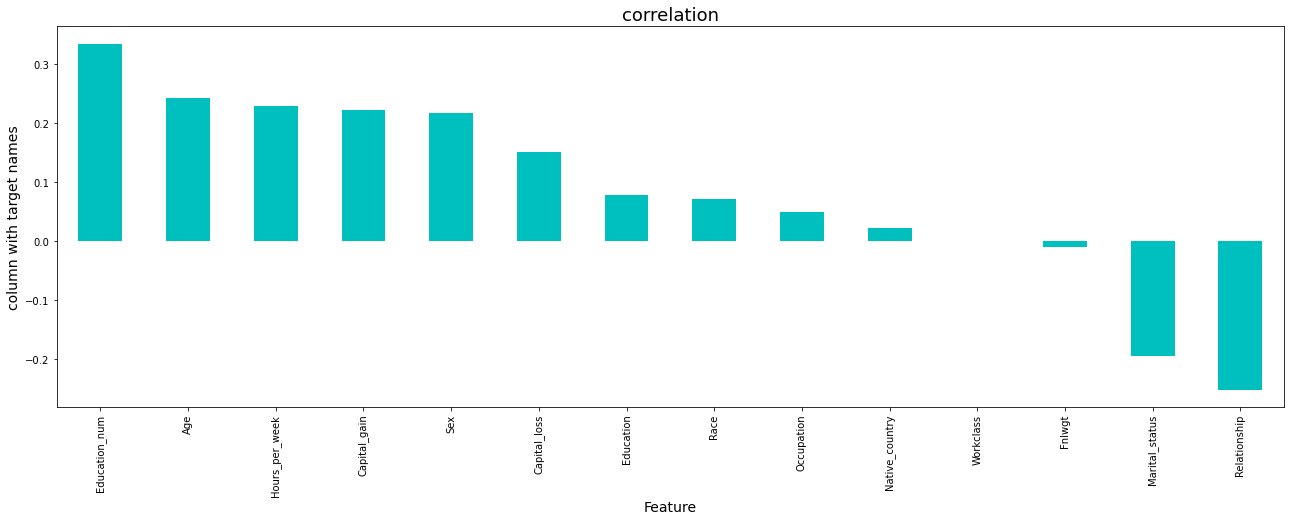

In [628]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [629]:
corr_mat["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.334727
Age               0.242548
Hours_per_week    0.228611
Capital_gain      0.221886
Sex               0.216599
Capital_loss      0.151480
Education         0.078338
Race              0.070960
Occupation        0.049832
Native_country    0.023107
Workclass         0.001130
Fnlwgt           -0.009509
Marital_status   -0.194585
Relationship     -0.251341
Name: Income, dtype: float64

Using Heatmap, Correlation Matrix we can conclude that prediction done earlier is almost true.


1. Education_num, Age, Hours_per_week, Capital_gain and Sex are positively correlated with Income Column data (in Positive Correlation Descending Order) reasonably


2. Rellationship, Marital_status are negatively correlated with Income Column data (in Negative Correlation Descending Order)


3. Fnlwgt is the least correlated with Income Column Data. If the Model Accuracy is less, We can be dropped this column if required because of very less correlationship with Target Variable

    After Analyzing the Accuracy of model built without Fnlwgt, it was observed that accuarcy was almost same so proceeding with this column

### Checking for Outliers through boxplots and analyzing each column Outliers 

In [630]:
x = df.drop(columns=['Income'])
y = df['Income']
x_outlier=x.copy()
x_outlier

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


Separate target and feature columns/ data for Outliers

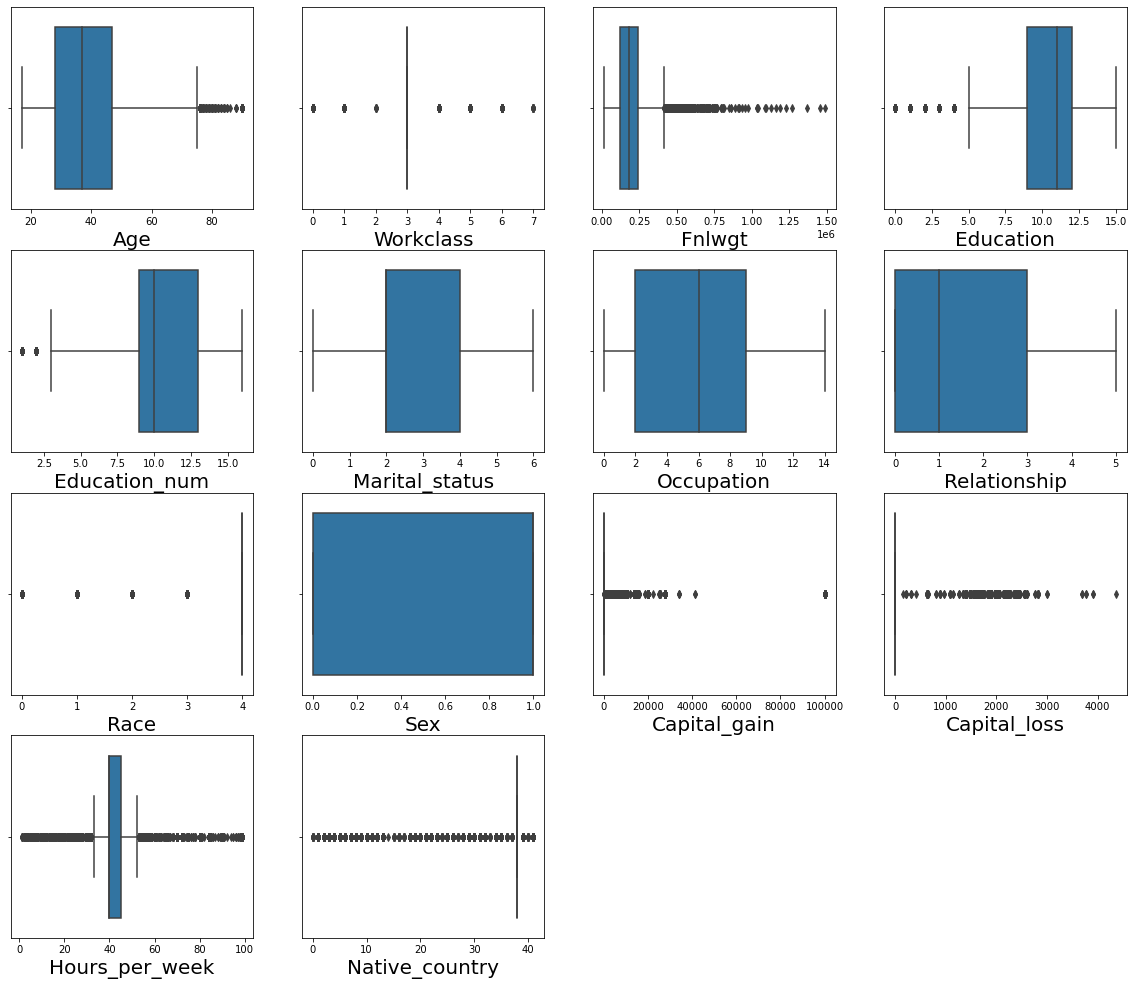

In [631]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

From above plots, we can confirm that there are outliers in Age, Fnlwgt, Education_num, Capitall_gain, Capital_loss, Hours_per_week Column Data

### Outliers Removal

#### 1. Using ZScore Method

Initially performed ZScore method on entire data and data loss was around 15%. So removing the Outliers for the Original Continous Data type columns only

Copying dataset without older categorical data columns to new file

In [632]:
from scipy.stats import zscore
z=np.abs(zscore(x_outlier[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]))
x_zscore=x_outlier[(z<3).all(axis=1)]

Applying zscore to remove the Outliers

##### Obtaining Data Set Shape after Outliers removed using zscore method

In [633]:
x_zscore.shape

(28113, 14)

##### Dataset Shape before Outliers removal

In [634]:
x_outlier.shape

(30724, 14)

In [697]:
zscore_data_loss=((30724-28113)/30724)*100
zscore_data_loss

8.498242416352038

Upon analyzing, found 8.49% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set. which is within acceptable range.

#### Analyzing Outliers through Boxplots after using Zscore

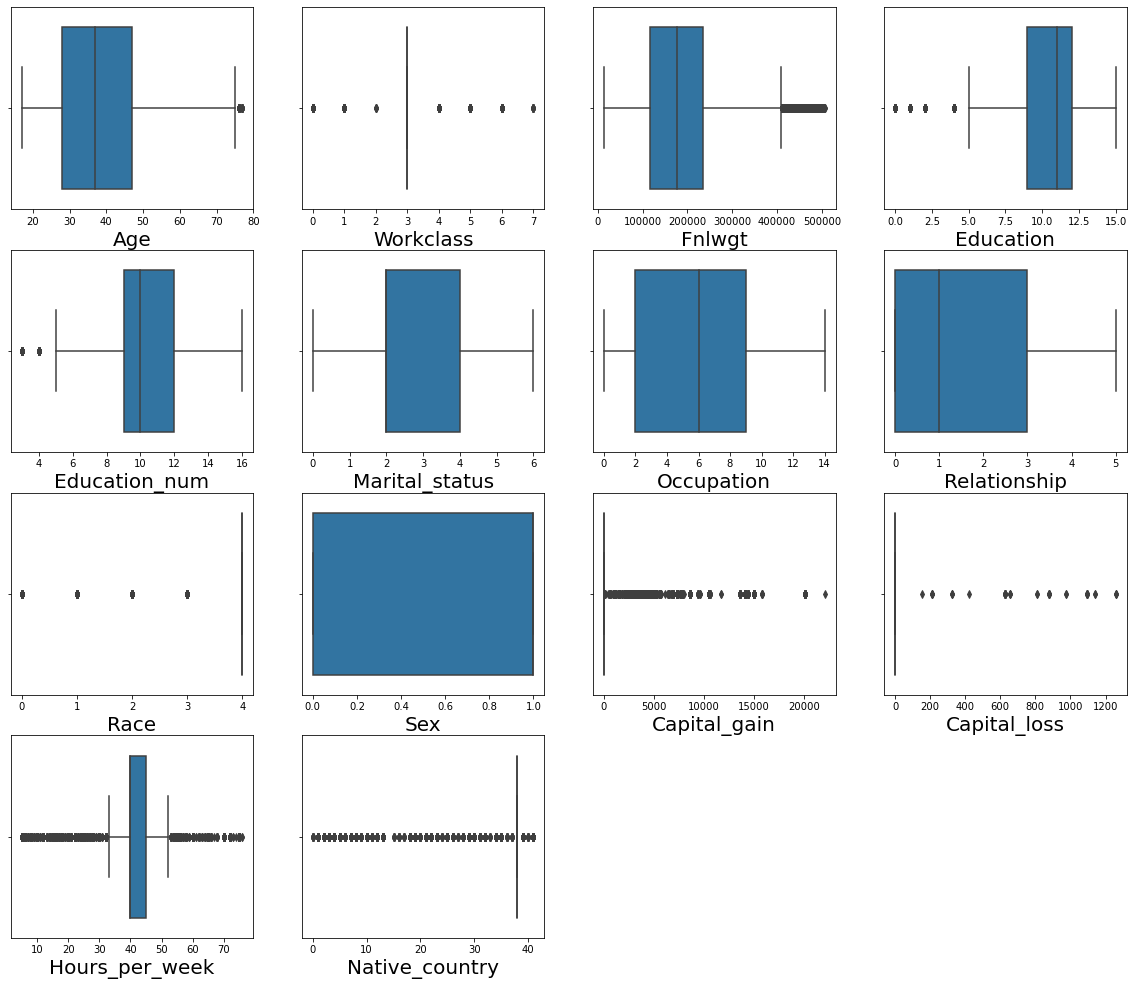

In [636]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_zscore:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_zscore[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

Upon reviewing above boxplots, we can observe significant amount of outliers is removed.

### Merging the Outlier Removed Feature Data Set with Earlier Original Data Set

In [637]:
drop_index = df.index.difference(x_zscore.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(28113, 15)

We can observe that Target variable is merged with outlier removed feature data set

### Skewness Analysis and Skewness Correction

#### 1. Using CBRT Technique

In [638]:
df_cbrt = df.copy()
df_cbrt

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28108,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
28109,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
28110,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
28111,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


Copying the dataset to new name for CBRT Technique

In [639]:
x = df_cbrt.drop(columns=['Income'])
y = df_cbrt['Income']
y.value_counts()

0    21626
1     6487
Name: Income, dtype: int64

In [640]:
x[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].skew()

Age                0.449137
Fnlwgt             0.630594
Education_num     -0.167930
Capital_gain       4.859942
Capital_loss      29.263758
Hours_per_week    -0.279458
dtype: float64

Upon review, found below columns has skewness out of range -0.5 to +0.5

Fnlwgt, Capital_gain, Capital_loss

In [641]:
x1=x[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
print(len(x1.skew().loc[x1.skew()>0.50]))
for index in x1.skew().index:
    if x1.skew().loc[index] >0.50:
        x1[index]=np.cbrt( x1[index])

3


There are 3 columns with skewness greater than 0.50.

In [642]:
x1.skew()

Age                0.449137
Fnlwgt            -0.378387
Education_num     -0.167930
Capital_gain       3.346135
Capital_loss      25.536888
Hours_per_week    -0.279458
dtype: float64

Upon reviewing above set after skewness correction from CBRT Technique, found below observations,


1. Fnlwgt skewness is reduced and within -0.50 to +0.50 range


2. Capital_gain, Capital_loss Skewness is reduced but it is still outside the range of -0.50 to +0.50

#### 2. Using Power Transformer Technique

In [643]:
df_powertransform = df.copy()
df_powertransform

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28108,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
28109,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
28110,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
28111,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [644]:
x2 = df_powertransform.drop(columns=['Income'])
y2 = df_powertransform['Income']
y2.value_counts()

0    21626
1     6487
Name: Income, dtype: int64

In [645]:
x2[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']].skew()

Age                0.449137
Fnlwgt             0.630594
Education_num     -0.167930
Capital_gain       4.859942
Capital_loss      29.263758
Hours_per_week    -0.279458
dtype: float64

Copying the dataset to new name for Power Transform Technique

In [646]:
x3=x2[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]
x3_skew = power_transform(x3)
x3_skew = pd.DataFrame(x3_skew, columns=x3.columns)
x3_skew.skew()

Age               -0.020544
Fnlwgt            -0.034751
Education_num      0.023188
Capital_gain       3.056936
Capital_loss      24.662091
Hours_per_week     0.126541
dtype: float64

Upon reviewing above set after skewness correction from power transform Technique, found skewness is reduced to better extent than CBRT Technique so proceeding with Power Transform Method

#### Analyzing the distribution plots after skewness correction

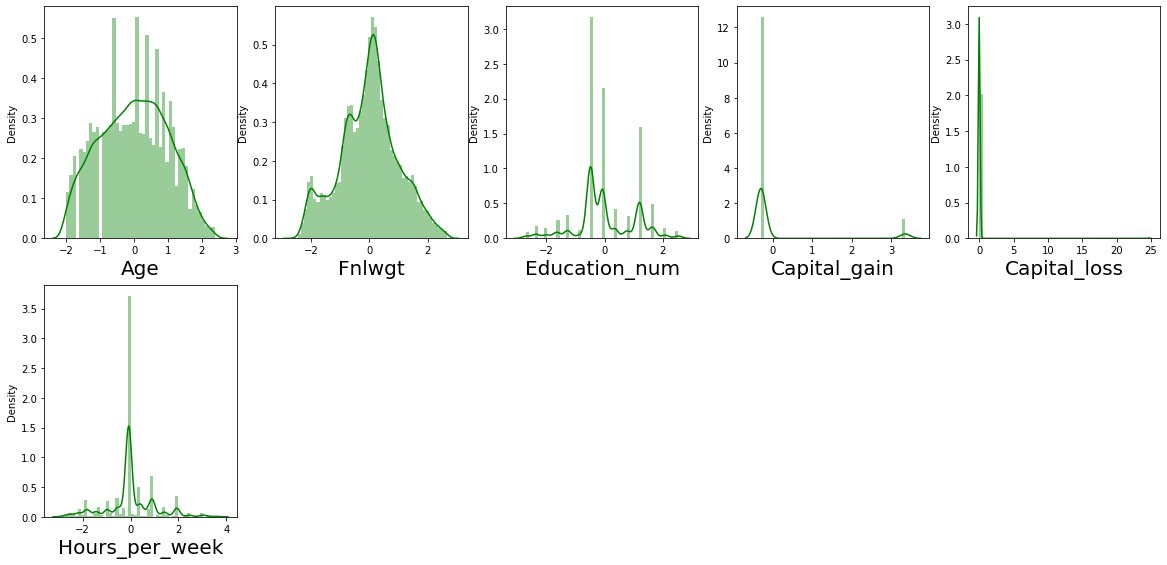

In [647]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x3_skew:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x3_skew[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe significant skewness is corrected and most of the columns data are normally distributed

### Merging the Skewness Corrected Feature Data Set with Earlier Original Data Set

In [648]:
drop_index = df.index.difference(x3_skew.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(28113, 15)

### Feature and Target Selection

In [649]:
x = df.drop(columns=['Income'])
y = df['Income']
y.value_counts()

0    21626
1     6487
Name: Income, dtype: int64

### Applying Standard Scaler in order to check the Multicollinearity

In [650]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 9.33055773e-01,  1.68249639e+00, -1.08096918e+00, ...,
        -3.73543369e-02, -2.54474105e+00,  2.46740589e-01],
       [-1.72905100e-03, -7.96025189e-02,  3.22082419e-01, ...,
        -3.73543369e-02, -3.62793704e-02,  2.46740589e-01],
       [ 1.16675198e+00, -7.96025189e-02,  5.24320748e-01, ...,
        -3.73543369e-02, -3.62793704e-02,  2.46740589e-01],
       ...,
       [ 1.55624566e+00, -7.96025189e-02, -3.53663957e-01, ...,
        -3.73543369e-02, -3.62793704e-02,  2.46740589e-01],
       [-1.24810882e+00, -7.96025189e-02,  1.71996664e-01, ...,
        -3.73543369e-02, -1.89439914e+00,  2.46740589e-01],
       [ 1.08885324e+00,  8.01446935e-01,  1.08842521e+00, ...,
        -3.73543369e-02, -3.62793704e-02,  2.46740589e-01]])

### Obtaining Multicollinearity using Variance Inflation Factor

In [651]:
vif = pd.DataFrame()

In [652]:
vif["Columns"] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Columns,vif
0,Age,1.175648
1,Workclass,1.008589
2,Fnlwgt,1.012905
3,Education,1.138238
4,Education_num,1.198725
5,Marital_status,1.138733
6,Occupation,1.019013
7,Relationship,1.669654
8,Race,1.032047
9,Sex,1.559512


From above set, we can observe that most of the columns have same multicollinearity and VIF. So we couldnt get an idea through so we shall proceed with PCA

### Principle Component Analysis 

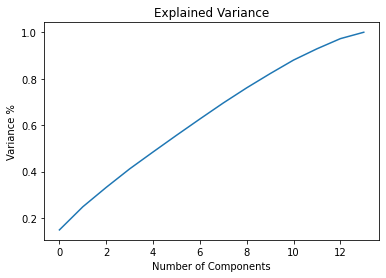

In [653]:
pca = PCA()
principle_components = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

We can conclude that for 95% variance, nearly 12 Principle components are contributing. So we can retain 12 components out of 14 components and build the model

In [654]:
pca_new = PCA(n_components=12)
new_components = pca_new.fit_transform(x_scaled)
x_principle=pd.DataFrame(new_components,columns=np.arange(12))
x_principle

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.648023,0.009764,0.488219,-1.328574,-0.902238,-0.966450,1.133605,0.109266,0.099803,-0.097561,2.449405,-0.371462
1,0.939606,0.455717,0.514941,-0.421293,0.740101,0.146091,-0.081901,-0.035375,-0.809936,-0.153560,0.000740,-1.183838
2,0.404314,2.761424,1.170954,0.845520,-0.292796,0.022049,-0.581570,-0.226901,0.302843,-1.900099,0.055661,0.475176
3,-2.462754,0.041797,0.409658,5.212891,-0.388399,-0.518682,1.549779,0.133481,-1.586871,2.199803,-0.974350,-0.429573
4,-1.447005,-2.031917,0.551124,0.058272,0.977626,0.052666,0.313835,0.898806,-1.033626,0.088362,-0.775601,0.344590
...,...,...,...,...,...,...,...,...,...,...,...,...
28108,-1.919796,-0.776856,-0.194175,-0.009851,-0.914419,0.790657,-0.380248,1.024329,-1.523891,0.130145,-1.430957,-0.226161
28109,0.929199,0.531387,-0.076928,-0.574071,0.142646,0.046891,-0.173887,-0.426583,-0.055006,0.055741,0.442551,-0.320128
28110,-1.876451,-0.621124,1.089640,-0.725313,0.462732,-0.581558,0.170000,0.319675,0.843134,0.283018,0.361842,2.574232
28111,-1.805137,0.312313,-0.716366,-0.913766,1.169726,-0.337917,0.265331,0.225348,0.907467,0.120932,1.211924,-0.807724


### Selecting KBest Features

#### Through KBest Features Technique, Features with least score can be obtained which will help us in deciding which columns to drop before proceeding to Model Building

In [655]:
best_features = SelectKBest(score_func = f_classif, k = 14)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)

In [656]:
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
columns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Features', 'Scores']
print(featureScores.nlargest(15,'Scores'))

          Features       Scores
10    Capital_gain  3685.132200
4    Education_num  3170.116486
0              Age  1820.064358
7     Relationship  1818.927239
12  Hours_per_week  1573.958407
9              Sex  1304.870409
5   Marital_status  1053.827722
8             Race   145.124583
3        Education   143.826467
6       Occupation    56.986705
11    Capital_loss     8.214736
13  Native_country     7.839363
2           Fnlwgt     2.947886
1        Workclass     2.319057


Upon reviewing found no least Best Features Scores so proceeding with same dataset without dropping any column further

In [658]:
x_best = x.copy() 

In [659]:
x_best

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28108,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
28109,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
28110,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
28111,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


### Resolving Class Imbalance using Oversampling (SMOTE Technique)

In [660]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x_best,y)

In [661]:
y_over.value_counts()

1    21626
0    21626
Name: Income, dtype: int64

Class Imbalance is resolved

In [662]:
x = sc.fit_transform(x_over)
y = y_over.copy()

Applying Standard Scaler since scaling will help in better accuracy

## Model Building: Classification Problem

### Finding the Best Random State 

In [663]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7770900141695876 on random_state: 95


In [664]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

In [665]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cvs_rfc=cvs(rfc,x,y,cv=5).mean()
roc_rfc=roc_auc_score(y_test,rfc_pred)

#Logistic Regression Model

lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cvs_lrc=cvs(lrc,x,y,cv=5).mean()
roc_lrc=roc_auc_score(y_test,lrc_pred)

#Decision Tree Classifier Model

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cvs_dtc=cvs(dtc,x,y,cv=5).mean()
roc_dtc=roc_auc_score(y_test,dtc_pred)

#SVC Model

sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cvs_sv=cvs(sv,x,y,cv=5).mean()
roc_sv=roc_auc_score(y_test,sv_pred)

#K Nearest Neighbors Classifier Model

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cvs_knn=cvs(knn,x,y,cv=5).mean()
roc_knn=roc_auc_score(y_test,knn_pred)

### Random Forest Classifier 

In [666]:
confusion_matrix_rfc

array([[5942,  762],
       [ 696, 6009]], dtype=int64)

In [667]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6704
           1       0.89      0.90      0.89      6705

    accuracy                           0.89     13409
   macro avg       0.89      0.89      0.89     13409
weighted avg       0.89      0.89      0.89     13409



In [668]:
print(cvs_rfc)

0.8810029673471542


In [669]:
print(roc_rfc)

0.8912666917610376


rfc_difference = 89-88.10 = 0.90

### Logistic Regression Model

In [670]:
confusion_matrix_lrc

array([[5049, 1655],
       [1334, 5371]], dtype=int64)

In [671]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      6704
           1       0.76      0.80      0.78      6705

    accuracy                           0.78     13409
   macro avg       0.78      0.78      0.78     13409
weighted avg       0.78      0.78      0.78     13409



In [672]:
print(cvs_lrc)

0.768728057767387


In [673]:
print(roc_lrc)

0.7770882276255208


lrc_difference = 78-76.87 = 1.13

### Decision Tree Classifier Model

In [674]:
confusion_matrix_dtc

array([[5597, 1107],
       [ 916, 5789]], dtype=int64)

In [675]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      6704
           1       0.84      0.86      0.85      6705

    accuracy                           0.85     13409
   macro avg       0.85      0.85      0.85     13409
weighted avg       0.85      0.85      0.85     13409



In [676]:
print(cvs_dtc)

0.8407504334758988


In [677]:
print(roc_dtc)

0.8491301174274176


dtc_difference = 85-84.07 = 0.93

### SVC Model

In [678]:
confusion_matrix_sv

array([[5449, 1255],
       [ 725, 5980]], dtype=int64)

In [679]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      6704
           1       0.83      0.89      0.86      6705

    accuracy                           0.85     13409
   macro avg       0.85      0.85      0.85     13409
weighted avg       0.85      0.85      0.85     13409



In [680]:
print(cvs_sv)

0.8467369778494651


In [681]:
print(roc_sv)

0.852335033432465


sv_difference = 85-84.67 = 0.33

### K Nearest Neighbors Classifier Model

In [682]:
confusion_matrix_knn

array([[5593, 1111],
       [ 821, 5884]], dtype=int64)

In [683]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6704
           1       0.84      0.88      0.86      6705

    accuracy                           0.86     13409
   macro avg       0.86      0.86      0.86     13409
weighted avg       0.86      0.86      0.86     13409



In [684]:
print(cvs_knn)

0.8549448966105693


In [685]:
print(roc_knn)

0.8559160535453363


knn_difference = 86-85.49 = 0.51

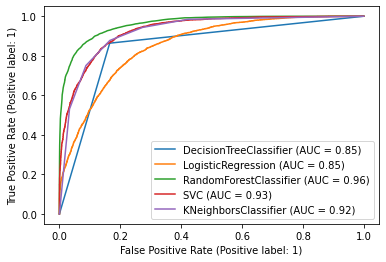

In [686]:
disp = plot_roc_curve(dtc,x_test,y_test)
mod = [lrc,rfc,sv,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Upon reviewing the difference between Accuracy and cross validation score, SV Classifier Model and K Nearest Neighbors Classifier Model ranks with least difference and followed by Random Forest Classifier. However, when ROC is analyzed based on the above graph, Random Forest Classifier has best AUC so choosing Random Forest Classifier as Best Model

### Hyper Parameter Tuning Using Grid Search 

#### Defining the Parameters list for Random Forest Classifier

In [687]:
parameters = {'ccp_alpha': np.array([5,0.5,0.05,0.005,0.0005,1,0.1,0.01,0.001,0.0001,0]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [300,200,150],
             'max_features': ["auto","sqrt","log2"]}

In [688]:
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [690]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([5.e+00, 5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02,
       1.e-03, 1.e-04, 0.e+00]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 200, 150],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [691]:
GridCV.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.0001,
 'criterion': 'entropy',
 'max_depth': 200,
 'max_features': 'log2'}

Obtaining Best Parameters details for Best Model after training the parameters list given

### Training the Best Model with the Best Model Parameters

In [692]:
Best_model = RandomForestClassifier(ccp_alpha = 0.0001, bootstrap = False, criterion = 'entropy', max_depth = 200, max_features = 'log2')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

89.15653665448579


In [693]:
confusion_matrix = confusion_matrix(y_test,pred_rfc_bm)
confusion_matrix

array([[5960,  744],
       [ 710, 5995]], dtype=int64)

### Saving the Best Model

In [694]:
joblib.dump(Best_model,"Census_Income_Final_Best_Model_Random_Forest_Classifier.pkl")

['Census_Income_Final_Best_Model_Random_Forest_Classifier.pkl']

### Loading the Best Model

In [695]:
joblib.dump(Best_model,"Census_Income_Final_Best_Model_Random_Forest_Classifier.pkl")

['Census_Income_Final_Best_Model_Random_Forest_Classifier.pkl']

### Comparing Actual Value and Predicted Value

In [696]:
actual_data = np.array(y_test)
predicted_data = np.array(Best_model.predict(x_test))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
13404,0,0
13405,0,0
13406,1,1
13407,1,0


Upon review, found Predicted Value is 89.15% equivalent to Actual Values